## 11 (coding) Linear Regression

### 11.1

In [19]:
import numpy as np
import matplotlib.pyplot as plt

no_x = 100
x = np.linspace(0, 1, no_x)
eps = 0.2
y = 1 + x + eps * np.random.random(size=len(x))

In [20]:
X = np.column_stack((np.ones(len(x)), x))
y = y.reshape(-1, 1)
coeff = np.linalg.inv(X.T @ X) @ X.T @ y

print("Coefficients:")
print(f"Intercept: {coeff[0][0]}")
print(f"Slope: {coeff[1][0]}")

Coefficients:
Intercept: 1.0960921281820704
Slope: 1.0017893722741684


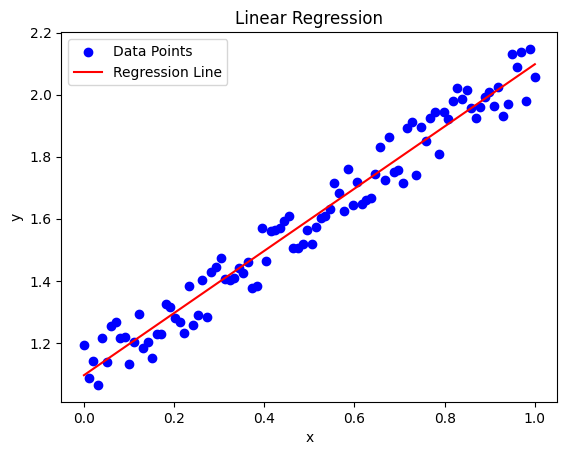

Predicted y value for x = 0.8: 1.897523626001405


In [21]:
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, X @ coeff, color='red', label='Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

x_new = 0.8  # Given value of x
y_pred = coeff[0][0] + coeff[1][0] * x_new
print(f"Predicted y value for x = {x_new}: {y_pred}")

### 11.2

Coefficients using sklearn:
Intercept: 1.0960921281820712
Slope: 1.001789372274169


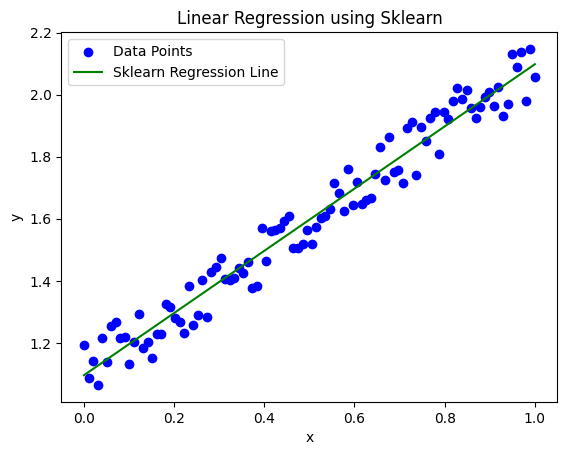

Predicted y value for x = 0.8 using sklearn: 1.8975236260014066


In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(x.reshape(-1, 1), y)

print("Coefficients using sklearn:")
print(f"Intercept: {model.intercept_[0]}")
print(f"Slope: {model.coef_[0][0]}")

y_sklearn_pred = model.predict(x.reshape(-1, 1))

plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y_sklearn_pred, color='green', label='Sklearn Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression using Sklearn')
plt.legend()
plt.show()

y_pred_sklearn = model.predict([[0.8]])
print(f"Predicted y value for x = 0.8 using sklearn: {y_pred_sklearn[0][0]}")

## 12

### 12.1 complete the following code of logistic regression

Model Accuracy: 100.00%


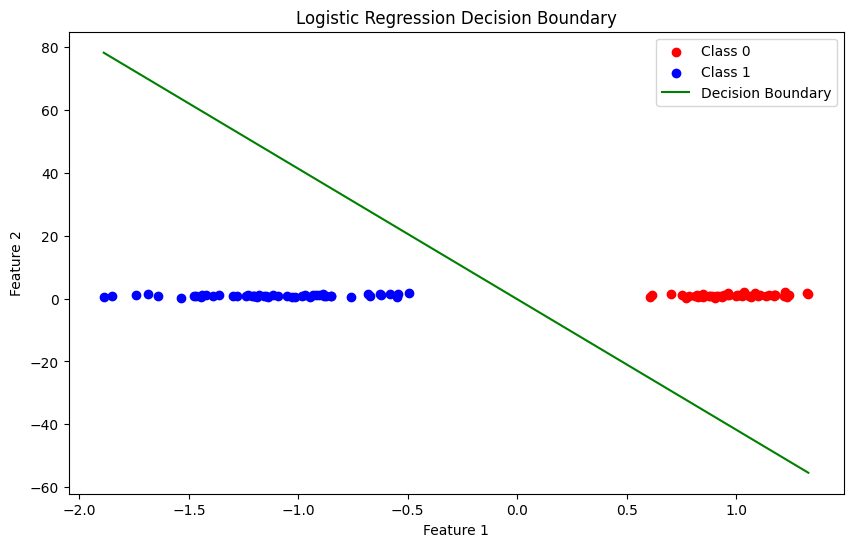

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
alpha = 0.01  
num_iter = 1000

X, y = make_classification(
    n_samples=100, n_features=2, n_redundant=0,
    n_informative=2, random_state=1, n_clusters_per_class=1
)

def add_ones(X):
    return np.hstack((np.ones((X.shape[0], 1)), X))

X_1 = add_ones(X)  

w = np.zeros(X_1.shape[1])
m = y.size 

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def comp_p(X, w):
    return sigmoid(np.dot(X, w))

for i in range(num_iter):
    p = comp_p(X_1, w)

    gradient = (1 / m) * np.dot(X_1.T, (p - y))

    w -= alpha * gradient

def predict(X, w):
    return comp_p(X, w) >= 0.5  


y_pred = predict(X_1, w)


accuracy = np.mean(y_pred == y) * 100

print(f"Model Accuracy: {accuracy:.2f}%")

plt.figure(figsize=(10, 6))


plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')


x_boundary = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_boundary = -(w[0] + w[1] * x_boundary) / w[2]  # w0 + w1*x + w2*y = 0
plt.plot(x_boundary, y_boundary, color='green', label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Logistic Regression Decision Boundary')
plt.show()

### 12.2

Model Accuracy with L2 Regularization: 100.00%


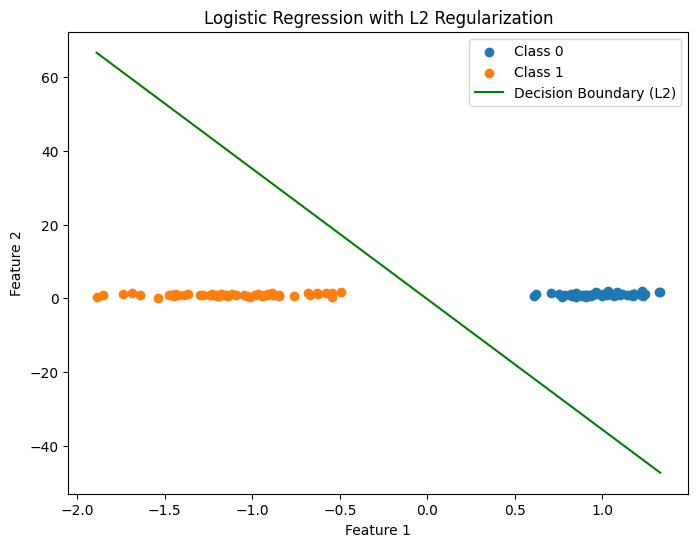

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

alpha = 0.01  
num_iter = 1000  
lambda_reg = 0.1 

X, y = make_classification(
    n_samples=100, n_features=2, n_redundant=0,
    n_informative=2, random_state=1, n_clusters_per_class=1
)

def add_ones(X):
    return np.hstack((np.ones((X.shape[0], 1)), X))

X_1 = add_ones(X)  

w = np.zeros(X_1.shape[1])
m = y.size 

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def comp_p(X, w):
    return sigmoid(np.dot(X, w))

for i in range(num_iter):
    p = comp_p(X_1, w)  

    gradient = (1 / m) * np.dot(X_1.T, (p - y)) + lambda_reg * w

    w -= alpha * gradient

def predict(X, w):
    return comp_p(X, w) >= 0.5 

y_pred = predict(X_1, w)
accuracy = np.mean(y_pred == y) * 100

print(f"Model Accuracy with L2 Regularization: {accuracy:.2f}%")

plt.figure(figsize=(8, 6))
for target in np.unique(y):
    indices = np.where(y == target)
    plt.scatter(X[indices, 0], X[indices, 1], label=f'Class {target}')

# Plot decision boundary
x_boundary = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_boundary = -(w[0] + w[1] * x_boundary) / w[2]
plt.plot(x_boundary, y_boundary, color='green', label='Decision Boundary (L2)')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Logistic Regression with L2 Regularization')
plt.show()

### 12.3

Accuracy with sklearn: 100.00%
Accuracy with manual implementation: 100.00%


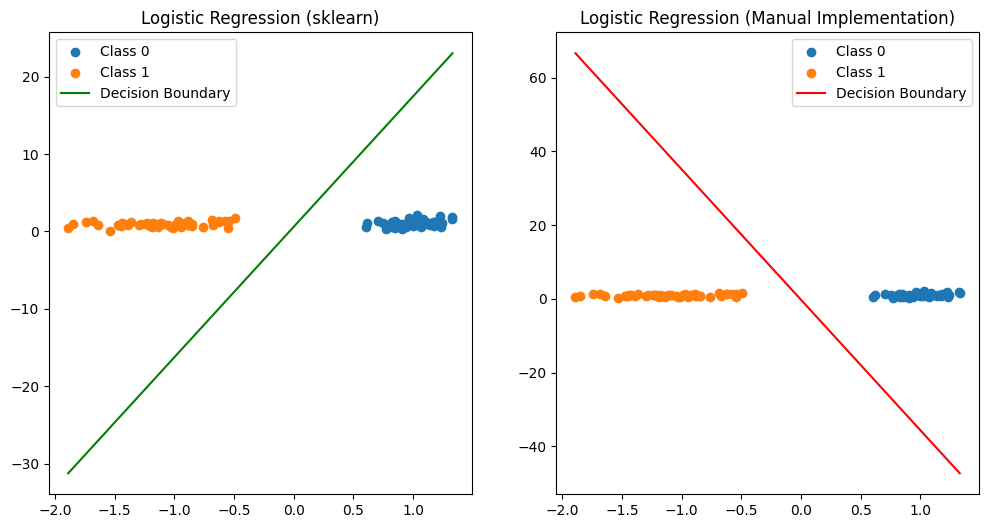

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X, y = make_classification(
    n_samples=100, n_features=2, n_redundant=0,
    n_informative=2, random_state=1, n_clusters_per_class=1
)

model = LogisticRegression(penalty='l2', C=1/lambda_reg, solver='lbfgs')

model.fit(X, y)

y_pred_sklearn = model.predict(X)

accuracy_sklearn = accuracy_score(y, y_pred_sklearn)
print(f"Accuracy with sklearn: {accuracy_sklearn * 100:.2f}%")

def predict(X, w):
    return comp_p(add_ones(X), w) >= 0.5

y_pred_manual = predict(X, w)  
accuracy_manual = np.mean(y_pred_manual == y) * 100
print(f"Accuracy with manual implementation: {accuracy_manual:.2f}%")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Logistic Regression (sklearn)')
for target in np.unique(y):
    indices = np.where(y == target)
    plt.scatter(X[indices, 0], X[indices, 1], label=f'Class {target}')
x_boundary = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_boundary = -(model.intercept_[0] + model.coef_[0][0] * x_boundary) / model.coef_[0][1]
plt.plot(x_boundary, y_boundary, color='green', label='Decision Boundary')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Logistic Regression (Manual Implementation)')
for target in np.unique(y):
    indices = np.where(y == target)
    plt.scatter(X[indices, 0], X[indices, 1], label=f'Class {target}')
y_boundary_manual = -(w[0] + w[1] * x_boundary) / w[2]
plt.plot(x_boundary, y_boundary_manual, color='red', label='Decision Boundary')
plt.legend()

plt.show()

## 13(coding) Correlation analysis in Feature Selection

In [24]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)

correlation_matrix = df.corr()

target_correlation = correlation_matrix["target"]

sorted_features = target_correlation.abs().sort_values(ascending=False)

top_10_features = sorted_features[1:11]  

print("Top 10 Features based on Correlation with Target:")
print(top_10_features)

Top 10 Features based on Correlation with Target:
worst concave points    0.793566
worst perimeter         0.782914
mean concave points     0.776614
worst radius            0.776454
mean perimeter          0.742636
worst area              0.733825
mean radius             0.730029
mean area               0.708984
mean concavity          0.696360
worst concavity         0.659610
Name: target, dtype: float64


## 14 (coding) PCA



### 14.1 

In [27]:
import numpy as np
import pandas as pd

data = pd.read_csv('iris.csv')

X = data.iloc[:, 0:4]

Y = data.iloc[:, 4]

cov_matrix = np.cov(X.T)  

eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
top_2_indices = sorted_indices[:2]

eigvec_set = eigenvectors[:, top_2_indices]

print("Eigenvalues:")
print(eigenvalues[top_2_indices])
print("\nTop 2 Eigenvectors:")
print(eigvec_set)

Eigenvalues:
[4.20438706 0.24314579]

Top 2 Eigenvectors:
[[-0.36263433  0.6558202 ]
 [ 0.08122848  0.73001455]
 [-0.85629752 -0.17703033]
 [-0.35868209 -0.07509244]]


### 14.2

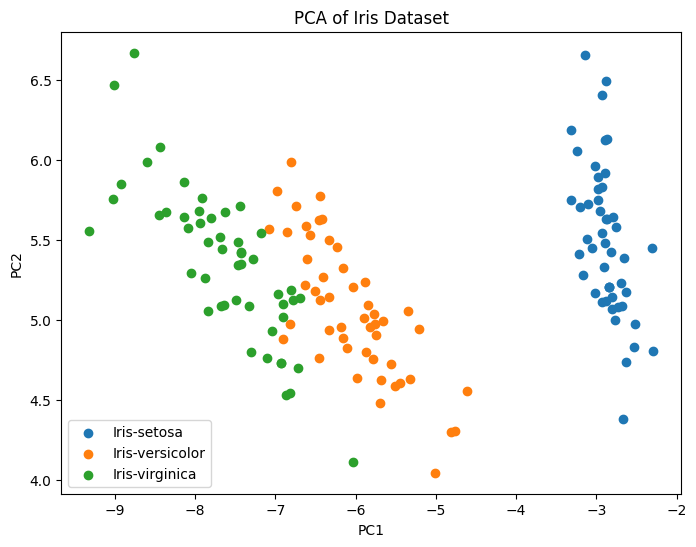

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('iris.csv')

X = data.iloc[:, 0:4]

Y = data.iloc[:, 4]

cov_matrix = np.cov(X.T)

eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
top_2_indices = sorted_indices[:2]
eigvec_set = eigenvectors[:, top_2_indices]

pca_X = np.dot(eigvec_set.T, X.T).T

plt.figure(figsize=(8, 6))
for target in np.unique(Y):
    indices = np.where(Y == target)
    plt.scatter(pca_X[indices, 0], pca_X[indices, 1], label=target)

# Set plot labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.show()

### 14.3

Explained Variance by each component:
[0.92395437 0.05343362]


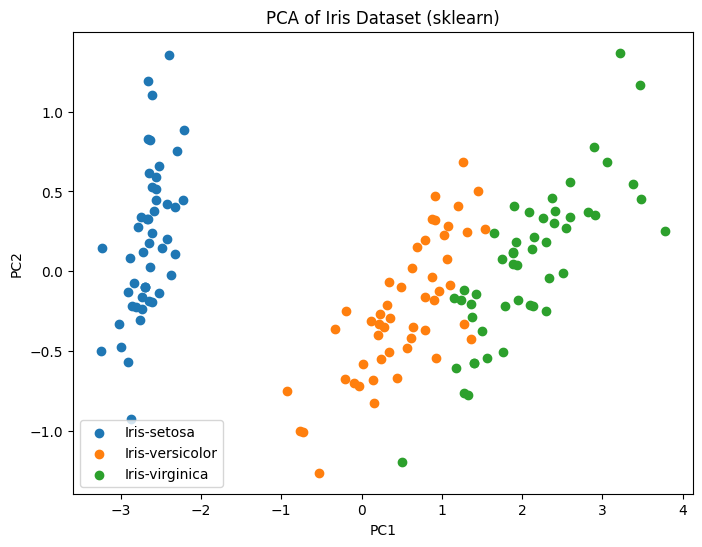

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

data = pd.read_csv('iris.csv')

X = data.iloc[:, 0:4]

Y = data.iloc[:, 4]

pca = PCA(n_components=2)
pca_X_sklearn = pca.fit_transform(X)

print("Explained Variance by each component:")
print(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
for target in np.unique(Y):
    indices = np.where(Y == target)
    plt.scatter(pca_X_sklearn[indices, 0], pca_X_sklearn[indices, 1], label=target)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Iris Dataset (sklearn)')
plt.legend()
plt.show()